In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func
from pathlib import Path

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")



In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
Base.metadata.create_all(engine)


# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# View all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [7]:
# Save references to each table
database_path = Path("../Resources/hawaii.sqlite")

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(query_date)




2016-08-23


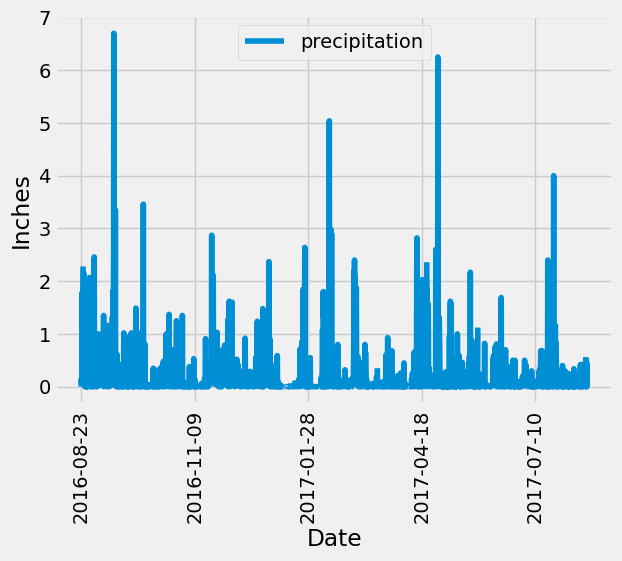

In [11]:
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
sel = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >='2016-08-23').order_by(Measurement.date).all()
prcp_df = pd.DataFrame(sel, columns=['precipitation','Date'])
prcp_df.set_index('Date')

# Sort the dataframe by date
prcp_df_sort = prcp_df.sort_values('Date')


# # Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='Date', grid=True)
plt.xlabel('Date')
plt.ylabel('Inches')
ax=plt.gca()
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

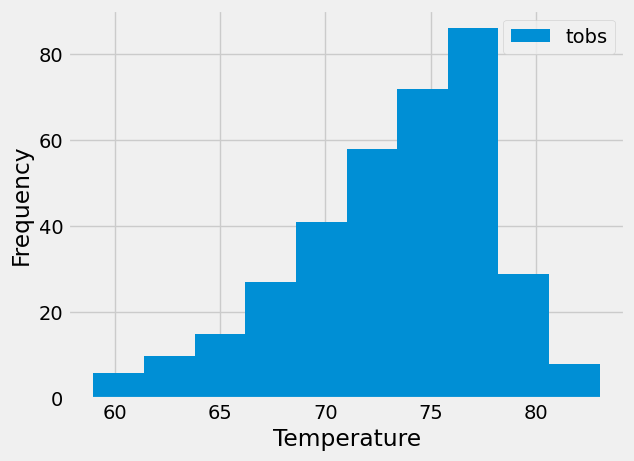

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_most_active = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >='2016-08-23').all()
temp_active_df = pd.DataFrame(temp_most_active, columns=['tobs'])
temp_active_df.plot.hist()
plt.xlabel('Temperature')
plt.show()

# Close Session

In [17]:
# Close Session
session.close()